In [1]:
%load_ext autoreload
%autoreload 2 

In [2]:
import logging 
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pylab as plt

from dagger.graph import DAG
from dagger.query import Query
from dagger.common import make_fake_df, normalise

logging.basicConfig(
    level=logging.DEBUG,
    format='%(asctime)s [%(filename)s:%(funcName)s:%(lineno)d] %(levelname)s - %(message)s',
)

2019-02-17 15:49:12,886 [pyplot.py:switch_backend:211] DEBUG - Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [3]:
df = pd.DataFrame({"a": [1, 1, 1, 1, 0, 0, 0, 0], 
                   "b": [0, 1, 0, 1, 1, 1, 1, 0], 
                   "c": [0, 0, 1, 0, 0, 1, 0, 1],
                   "d": [1, 1, 0, 1, 0, 0, 0, 0],
                   "e": [1, 1, 1, 1, 0, 0, 0, 0]})
dag = DAG(df).add_edge("a", "b").add_edge("a", "c").add_edge("c", "b")

2019-02-17 15:49:13,305 [graph.py:add_edge:235] DEBUG - created connection a -> b
2019-02-17 15:49:13,306 [graph.py:add_edge:235] DEBUG - created connection a -> c
2019-02-17 15:49:13,306 [graph.py:add_edge:235] DEBUG - created connection c -> b


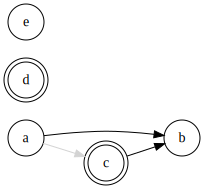

In [4]:
from graphviz import Digraph

def mkplot(dag, givens, dos):
    """A pretty plotting function."""
    d = Digraph()
    d.attr(rankdir='LR')
    d.attr('node', shape='circle')
    for n in dag.graph.nodes:
        if (n in givens) or (n in dos):
            d.node(n, shape='doublecircle')
        else:
            d.node(n)
    for n1, n2 in dag.graph.edges:
        if n2 in dos:
            d.edge(n1, n2, color="lightgray")
        else:
            d.edge(n1, n2)
    return d

mkplot(dag, givens=["d"], dos=["c"])

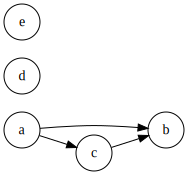

In [5]:
dag.plot()

2019-02-17 15:49:14,309 [graph.py:add_edge:235] DEBUG - created connection e -> a
2019-02-17 15:49:14,310 [graph.py:add_edge:235] DEBUG - created connection e -> d
2019-02-17 15:49:14,311 [graph.py:add_edge:235] DEBUG - created connection a -> d
2019-02-17 15:49:14,311 [graph.py:add_edge:235] DEBUG - created connection b -> d
2019-02-17 15:49:14,312 [graph.py:add_edge:235] DEBUG - created connection a -> b
2019-02-17 15:49:14,313 [graph.py:add_edge:235] DEBUG - created connection a -> c
2019-02-17 15:49:14,313 [graph.py:add_edge:235] DEBUG - created connection b -> c
2019-02-17 15:49:14,314 [graph.py:add_edge:235] DEBUG - created connection c -> f
2019-02-17 15:49:14,314 [graph.py:add_edge:235] DEBUG - created connection g -> f


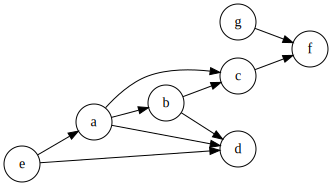

In [6]:
dag = (DAG(make_fake_df(7))
       .add_edge("e", "a")
       .add_edge("e", "d")
       .add_edge("a", "d")
       .add_edge("b", "d")
       .add_edge("a", "b")
       .add_edge("a", "c")
       .add_edge("b", "c")
       .add_edge("c", "f")
       .add_edge("g", "f"))

dag.plot()

2019-02-17 15:49:14,714 [query.py:_check_query_input:66] DEBUG - checking key d=1
2019-02-17 15:49:14,716 [query.py:_check_query_input:66] DEBUG - checking key a=0
2019-02-17 15:49:14,717 [query.py:_check_query_input:66] DEBUG - checking key c=1


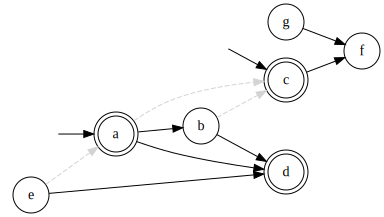

In [7]:
from dagger.query import Query

q = Query(dag).given(d=1).do(a=0, c=1)
q.plot()

In [8]:
# Query(dag).given(d=1).do(a=1, c=1).infer()

Next up: testing for independencies. 

In [9]:
import itertools as it 
import networkx as nx

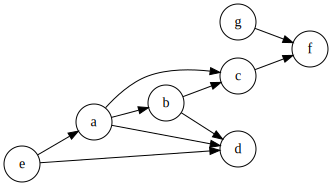

In [10]:
dag.plot()

In [11]:
dag.undirected_paths("e", "d")

[['e', 'a', 'd'], ['e', 'a', 'b', 'd'], ['e', 'a', 'c', 'b', 'd'], ['e', 'd']]

In [12]:
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s [%(filename)s:%(funcName)s:%(lineno)d] %(levelname)s - %(message)s',
)

In [13]:
dag.active_paths("e", "d", z="a")

2019-02-17 15:49:18,868 [graph.py:directed_paths:125] DEBUG - found directed path: e -> a -> d
2019-02-17 15:49:18,869 [graph.py:directed_paths:125] DEBUG - found directed path: e -> a -> b -> d
2019-02-17 15:49:18,870 [graph.py:directed_paths:125] DEBUG - found directed path: e -> a -> c <- b -> d
2019-02-17 15:49:18,871 [graph.py:directed_paths:125] DEBUG - found directed path: e -> d
2019-02-17 15:49:18,872 [graph.py:active_paths:139] DEBUG - now checking e -> given(a) -> d
2019-02-17 15:49:18,872 [graph.py:active_paths:139] DEBUG - now checking e -> given(a) -> b -> d
2019-02-17 15:49:18,873 [graph.py:active_paths:139] DEBUG - now checking e -> given(a) -> c <- b -> d
2019-02-17 15:49:18,873 [graph.py:active_paths:139] DEBUG - now checking e -> d
